<a href="https://colab.research.google.com/github/carlosvasquez3/M.Sc.-in-Data-Science/blob/main/Proyecto_Unidad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TITANIC


El dataset contiene información de pasajeros del Titanic, incluyendo características demográficas, socioeconómicas y de viaje, junto con una variable objetivo que indica si sobrevivieron o no al naufragio.

#Proyecto

##Librerías


In [1]:
# Importe de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Carga de datos

In [2]:
# Se crea el dataframe
df = pd.read_csv('https://raw.githubusercontent.com/carlosvasquez3/M.Sc.-in-Data-Science/refs/heads/main/Programaci%C3%B3n%20b%C3%A1sica/Data/train.csv') #Se utiliza github para almacenar la data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Se cargó el dataset desde GitHub usando su enlace raw y se verificó la correcta importación mostrando las primeras filas del DataFrame. Se procede a realizar el perfilado de datos.

## Perfilado de datos

Significado de las variables de la data.

| Variable   | Definición                                                | Clave |
|------------|-----------------------------------------------------------|-------|
| survival   | Supervivencia                                             | 0 = No, 1 = Sí |
| pclass     | Clase del boleto                                          | 1 = Primera, 2 = Segunda, 3 = Tercera |
| sex        | Sexo del pasajero                                         | — |
| age        | Edad en años                                              | — |
| sibsp      | Número de hermanos / cónyuges a bordo                    | — |
| parch      | Número de padres / hijos a bordo                          | — |
| ticket     | Número de boleto                                          | — |
| fare       | Tarifa pagada por el pasajero                             | — |
| cabin      | Número de cabina                                          | — |
| embarked   | Puerto de embarque                                        | C = Cherbourg, Q = Queenstown, S = Southampton |


In [3]:
# Información de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


El dataset contiene 891 registros y 12 variables. Se identifican variables numéricas (int64 y float64) y variables categóricas. Se observa que la columna Age presenta valores nulos, al igual que Cabin y Embarked.

In [4]:
# Resumen estadistico
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


El resumen estadístico muestra que la mayoría de los pasajeros viajaban en tercera clase y que aproximadamente el 38% sobrevivió. La edad promedio es cercana a los 30 años, aunque presenta valores faltantes. La mayoría viajaba sin familiares a bordo y la tarifa pagada presenta una alta variabilidad, con valores máximos considerablemente elevados.

In [5]:
# Nulos
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


La variable Edad presenta 177 valores faltantes, mientras que las variables Género (Sex) y Sobreviviente (Survived) no presentan valores nulos.

## Preprocesamiento de datos

Se eliminó la variable Cabin debido a la gran cantidad de valores nulos que contiene y a que no es necesaria para el análisis. Esto permite conservar más registros en el proceso de limpieza.

In [6]:
# Se elimina la variable Cabin del modelo
df = df.drop(columns=['Cabin'])

In [7]:
# Leer el nuevo dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Variable eliminada con exito

In [8]:
# Se veriifica nuevamente los nulos
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
# Se eliminan los registros con valores nulos
df = df.dropna()
df.shape

(712, 11)

In [10]:
# Se verifica nuevamente los nulos
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Después de eliminar la variable Cabin, se verificaron nuevamente los valores nulos y se procedió a eliminar los registros restantes con datos faltantes, tal como lo indica el proyecto. Es importante resaltar que los datos son un recurso valioso, por lo que la eliminación de registros debe realizarse con precaución, ya que puede reducir la muestra y afectar los resultados del análisis. En este caso, se tomó la decisión para garantizar un conjunto de datos limpio y consistente. **Por objeto de estudio**

In [11]:
df['Familia'] = df['SibSp'] + df['Parch'] + 1        #El tamaño de la familia del pasajero.


Se determina el tamaño de las familia de cada pasajero. Considerando el hecho de que si no tiene ningun miembro a bordo, se contaría como una familia unipersonal.

In [12]:
df.loc[:,'Sex'] = df['Sex'].str.upper()      #Estandarización para la columna Sex
df.loc[:, 'Sex'] = df['Sex'].replace({       #Conversión a valores reales
    'FEMALE': 1,
    'MALE': 2,                               #Ahora la variable de sexo femenino equivale a 1 y masculino equivale a 2
    'F': 1,
    'M': 2
})
df

/tmp/ipython-input-1116908204.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'Sex'] = df['Sex'].replace({       #Conversión a valores reales


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familia
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,Q,6
886,887,0,2,"Montvila, Rev. Juozas",2,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,1
889,890,1,1,"Behr, Mr. Karl Howell",2,26.0,0,0,111369,30.0000,C,1


Se estandarizan los valores en la columna Sex, para facilitar el posterior análisis. Personas identificadas con el sexo femenino tendrán el valor 1 y personas identificadas con el sexo masculino el valor 2

In [13]:
df.loc[:,'Embarked'] = df['Embarked'].str.upper()      #Estandarización para la columna Embarked
df.loc[:, 'Embarked'] = df['Embarked'].replace({       #Conversión a valores reales
    'C': 1,
    'Q': 2,                                            # Ahora la variable Cherbourg equivale a 1, Queenstown equivale a 2 y Southampton equivale a 3
    'S': 3,
})
df

/tmp/ipython-input-854112161.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'Embarked'] = df['Embarked'].replace({       #Conversión a valores reales


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familia
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,3,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3,2
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,2,6
886,887,0,2,"Montvila, Rev. Juozas",2,27.0,0,0,211536,13.0000,3,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,3,1
889,890,1,1,"Behr, Mr. Karl Howell",2,26.0,0,0,111369,30.0000,1,1


Se estandarizan los valores en la columna Embarked, para facilitar el posterior análisis. Si la persona embarcó en Cherbourg tomará el valor 1, si embarcó en Queenstown tomará el valor 2 y si embarcó en Southampton tomará el valor 3.

In [14]:
#Se calculó la tasa de supervivencia global de los pasajeros.

Total_sobrevivientes = df['Survived'].sum()

print('Total de sobrevivientes: ', Total_sobrevivientes)

Total_personas = len(df)

print('Total de personas: ', Total_personas)

Porcentaje_total = Total_sobrevivientes/Total_personas

print('Tasa global de supervivencia: ', (Porcentaje_total*100).round(2), '%')

#Se analizó la tasa de supervivencia según la clase del pasajero.

Pclass1_surv = df[df['Pclass'] == 1]['Survived'].sum()

Pclass1_total = df[df['Pclass'] == 1]['Survived'].count()

print('Tasa de supervivencia – Pasajeros Clase 1: ', (Pclass1_surv/Pclass1_total*100).round(2), '%')

Pclass2_surv = df[df['Pclass'] == 2]['Survived'].sum()

Pclass2_total = df[df['Pclass'] == 2]['Survived'].count()

print('Tasa de supervivencia – Pasajeros Clase 2: ', (Pclass2_surv/Pclass2_total*100).round(2), '%')

Pclass3_surv = df[df['Pclass'] == 3]['Survived'].sum()

Pclass3_total = df[df['Pclass'] == 3]['Survived'].count()

print('Tasa de supervivencia – Pasajeros Clase 3: ', (Pclass3_surv/Pclass3_total*100).round(2), '%')

#Se analizó la tasa de supervivencia según el género del pasajero.

Sex_female_surv = df[df['Sex'] == 1]['Survived'].sum()

Sex_female_total = df[df['Sex'] == 1]['Survived'].count()

Sex_male_surv = df[df['Sex'] == 2]['Survived'].sum()

Sex_male_total = df[df['Sex'] == 2]['Survived'].count()

print('Tasa de supervivencia de mujeres: ', ((Sex_female_surv/Sex_female_total)*100).round(2), '%')

print('Tasa de supervivencia de hombres: ', ((Sex_male_surv/Sex_male_total)*100).round(2), '%')

#Se analizó la tasa de supervivencia según rangos de edad previamente definidos.

rango_edad = [0, 12, 18, 35, 60, 100]

df['Rango_edad'] = pd.cut(df['Age'], bins = rango_edad)

surv_by_age = df.groupby('Rango_edad')['Survived'].mean()*100

print (surv_by_age.round(2))

#Se analizó la tasa de supervivencia según rangos del tamaño de la familia.

rango_familia = [0, 3, 6, 9, 12]

df['Rango_familia'] = pd.cut(df['Familia'], bins = rango_familia)

surv_by_family = df.groupby('Rango_familia')['Survived'].mean()*100

print (surv_by_family.round(2))

#Se analizó la tasa de supervivencia según el puerto de embarque.

Puerto_Cherbourg_surv = df[df['Embarked'] == 1]['Survived'].sum()

Puerto_Cherbourg_total = df[df['Embarked'] == 1]['Survived'].count()

Puerto_Queenstown_surv = df[df['Embarked'] == 2]['Survived'].sum()

Puerto_Queenstown_total = df[df['Embarked'] == 2]['Survived'].count()

Puerto_Southampton_surv = df[df['Embarked'] == 3]['Survived'].sum()

Puerto_Southampton_total = df[df['Embarked'] == 3]['Survived'].count()

print('Tasa de supervivencia de pasajeros embarcados en Cherbourg: ', ((Puerto_Cherbourg_surv/Puerto_Cherbourg_total)*100).round(2), '%')

print('Tasa de supervivencia de pasajeros embarcados en Queenstown: ', ((Puerto_Queenstown_surv/Puerto_Queenstown_total)*100).round(2), '%')

print('Tasa de supervivencia de pasajeros embarcados en Southampton: ', ((Puerto_Southampton_surv/Puerto_Southampton_total)*100).round(2), '%')




Total de sobrevivientes:  288
Total de personas:  712
Tasa global de supervivencia:  40.45 %
Tasa de supervivencia – Pasajeros Clase 1:  65.22 %
Tasa de supervivencia – Pasajeros Clase 2:  47.98 %
Tasa de supervivencia – Pasajeros Clase 3:  23.94 %
Tasa de supervivencia de mujeres:  75.29 %
Tasa de supervivencia de hombres:  20.53 %
Rango_edad
(0, 12]      57.97
(12, 18]     42.86
(18, 35]     38.27
(35, 60]     39.69
(60, 100]    19.05
Name: Survived, dtype: float64
Rango_familia
(0, 3]     40.54
(3, 6]     45.00
(6, 9]     22.22
(9, 12]      NaN
Name: Survived, dtype: float64
Tasa de supervivencia de pasajeros embarcados en Cherbourg:  60.77 %
Tasa de supervivencia de pasajeros embarcados en Queenstown:  28.57 %
Tasa de supervivencia de pasajeros embarcados en Southampton:  36.28 %


/tmp/ipython-input-689183409.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_age = df.groupby('Rango_edad')['Survived'].mean()*100
/tmp/ipython-input-689183409.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_family = df.groupby('Rango_familia')['Survived'].mean()*100


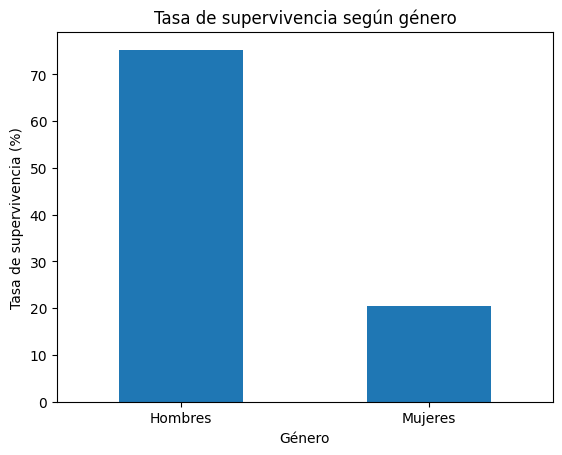

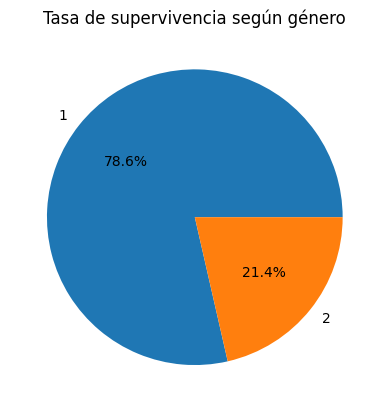

In [18]:
tasa_supervivencia_genero = df.groupby('Sex')['Survived'].mean() * 100

tasa_supervivencia_genero.index = ['Hombres', 'Mujeres']

tasa_supervivencia_genero.plot(kind='bar')

plt.title('Tasa de supervivencia según género')
plt.xlabel('Género')
plt.ylabel('Tasa de supervivencia (%)')
plt.xticks(rotation=0)
plt.show()

tasa_genero = df.groupby('Sex')['Survived'].mean()

plt.pie(
    tasa_genero,
    labels=['Hombres', 'Mujeres'],
    autopct='%1.1f%%'
)

plt.title('Tasa de supervivencia según género')
plt.show()




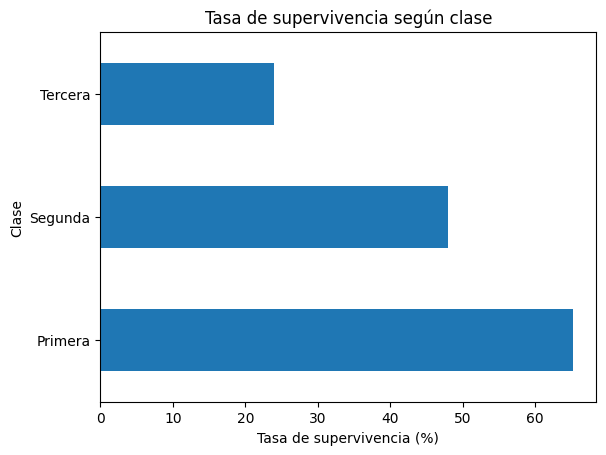

In [19]:
tasa_clase = df.groupby('Pclass')['Survived'].mean() * 100

# Renombrar índice
tasa_clase.index = ['Primera', 'Segunda', 'Tercera']

tasa_clase.plot(kind='barh')

plt.title('Tasa de supervivencia según clase')
plt.xlabel('Tasa de supervivencia (%)')
plt.ylabel('Clase')
plt.show()


/tmp/ipython-input-2961568281.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_supervivencia_edad = df.groupby('Rango_edad')['Survived'].mean() * 100. #Código del gráfico de supervivencia por edad


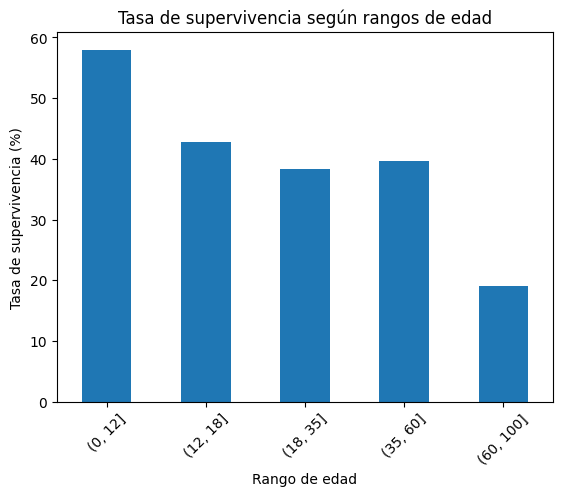

In [15]:
tasa_supervivencia_edad = df.groupby('Rango_edad')['Survived'].mean() * 100. #Código del gráfico de supervivencia por edad

tasa_supervivencia_edad.plot(kind='bar')

plt.title('Tasa de supervivencia según rangos de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Tasa de supervivencia (%)')
plt.xticks(rotation=45)
plt.show()



El gráfico presenta la tasa de supervivencia según rangos de edad. Se observa que los niños y luego jovenes presentan una mayor tasa de supervivencia en comparación con los otros rangos. Poniendo en evidencia lo prioritario que fue la salida de los niños y dejándonos la hipotesis de si una persona joven tiene más posibilidades de sobrevivir en condiciones extremas.

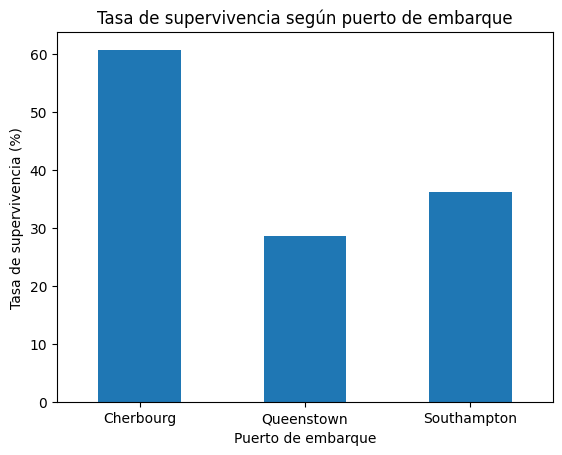

In [16]:
tasa_supervivencia_puerto = df.groupby('Embarked')['Survived'].mean() * 100.  #Código del grafico de supervivencia por puertos de embarque

tasa_supervivencia_puerto.plot(kind='bar')

plt.title('Tasa de supervivencia según puerto de embarque')
plt.xlabel('Puerto de embarque')
plt.ylabel('Tasa de supervivencia (%)')
plt.xticks(
    ticks=[0, 1, 2],
    labels=['Cherbourg', 'Queenstown', 'Southampton'],
    rotation=0
)
plt.show()


El gráfico presenta la tasa de supervivencia según el puerto de embarque. Se puede apreciar como las personas que salieron del puerto de Cherbourg tuvieron una tasa de supervivencia mas alto, se puede asumir que la posición socioecónomica pudo ser un factor influencial para sobrevivir. No obstante, sería interesante abundar si factores como la dieta, o costumbres de los diferentes territorios también influyeron en su capacidad de sobrevivir. Siendo Cherbourg el único puerto en la parte continental de Europa.